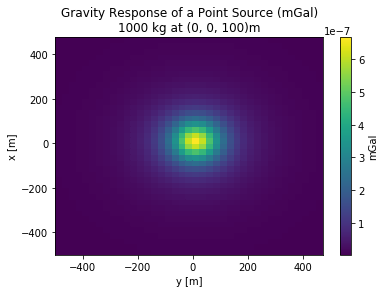

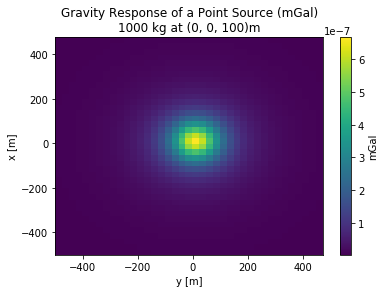

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# constants
gamma = 6.67408e-11 # [m^3 kg^-1 s^-2]
conv  = 100000 # [m/s^2] to [mGal]

# setup grid parameters [m]
xstart = -500
xend   =  500
xstep  =   25

ystart = -500
yend   =  500
ystep  =   25

# target parameters
mass = 1000 # mass [kg]

# location. Right hand coordinate system. [m]
xp   =   0
yp   =   0
zp   =   100


# make the grid
x = np.arange(xstart, xend, xstep)
y = np.arange(ystart, yend, ystep)
z = 0

# helpful parameters
nx = len(x)
ny = len(y)

xv, yv = np.meshgrid(x, y)

# vectorized notation (PREFERRED)
Gv = conv*gamma*mass*(zp-z)/((xp-xv)**2 + (yp-yv)**2 + (zp-z)**2)**(3./2.)

# index notation (ACCEPTABLE)
Gi = np.zeros([ny,nx])
for ix in range(nx):
    for iy in range(ny):
        Gi[iy,ix] = conv*gamma*mass*(zp-z)/((xp-x[ix])**2 
                                          + (yp-y[iy])**2 
                                          + (zp-z    )**2)**(3./2.)


# PLOTTING
substr = '%.0f kg at (%.0f, %.0f, %.0f)m'%(mass,xp,yp,zp)

plt.figure()
plt.pcolor(yv,xv,Gv)
plt.colorbar().set_label('mGal')
plt.xlabel('y [m]')
plt.ylabel('x [m]')
plt.title('Gravity Response of a Point Source (mGal)\n'+substr)

plt.figure()
plt.pcolor(y,x,Gi)
plt.colorbar().set_label('mGal')
plt.xlabel('y [m]')
plt.ylabel('x [m]')
plt.title('Gravity Response of a Point Source (mGal)\n'+substr)


plt.show()